In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

from typing import Literal

In [2]:
# TODO
# PCA iris
# LDA iris
# TSNE 
# UMAP

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

iris = datasets.load_iris()
x_iris = sc.fit_transform(iris.data)
y_iris = iris.target

print(x_iris.shape)

(150, 4)


In [4]:
def plot_2d(type: Literal['umap', 'svd', 'pca', 'tsne', 'lda'], x, y=y_iris, info: str = '' ):
    plt.figure(figsize=(8, 6))
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel(f'{type.upper()} Component 1')
    plt.ylabel(f'{type.upper()} Component 2')
    plt.title(f'{type.upper()} - Iris Dataset')
    plt.suptitle(info, fontsize=14, y=0.95)
    plt.show()

def plot_1d(type: Literal['umap', 'svd', 'pca', 'tsne', 'lda'], x, y=y_iris, info: str = '') :
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c=y, cmap=plt.cm.Set1)
    plt.xlabel(f'{type.upper()} Component')
    plt.ylabel('y')
    plt.title(f'{type.upper()} - 1D Projection')
    plt.suptitle(info, fontsize=14, y=0.95)
    plt.show()
    

### PCA


In [5]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pca.fit(x_iris)

print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922]


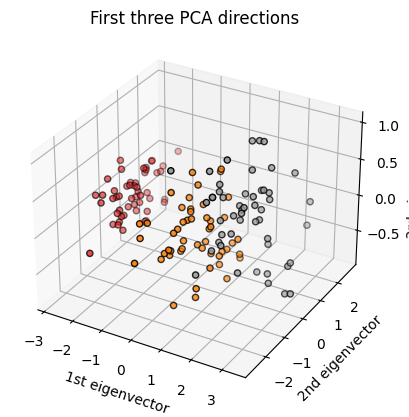

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_iris_pca = pca.transform(x_iris)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_iris_pca[:, 0], x_iris_pca[:, 1], x_iris_pca[:, 2], c=y_iris, cmap=plt.cm.Set1, edgecolor='k')
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()

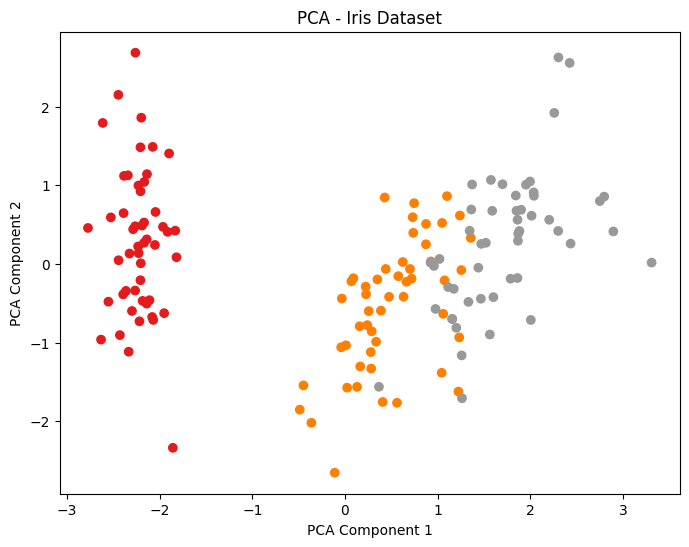

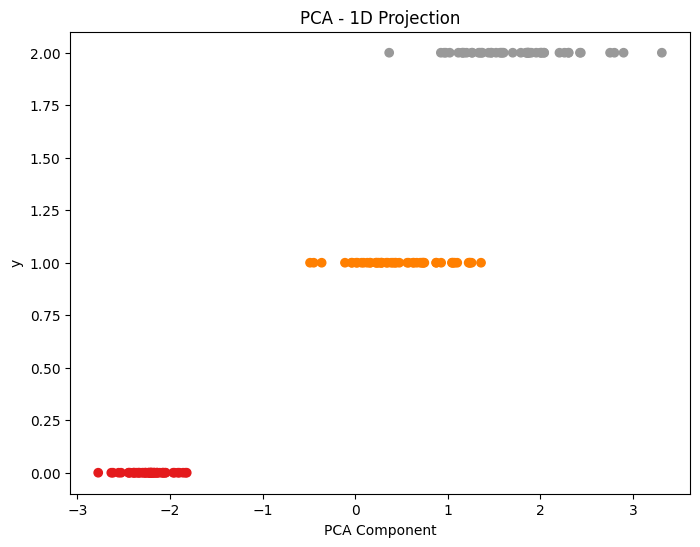

In [7]:
pca2d = PCA(n_components=2)
x_iris_pca2d = pca2d.fit_transform(x_iris)

plot_2d('pca', x_iris_pca2d)

pca1d = PCA(n_components=1)
x_iris_pca1d = pca1d.fit_transform(x_iris)
plot_1d('pca', x=x_iris_pca1d)




### LDA

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
x_iris_lda2d = lda.fit_transform(x_iris, y_iris)

lda1 = LDA(n_components=1)
x_iris_lda1d = lda1.fit_transform(x_iris, y_iris)

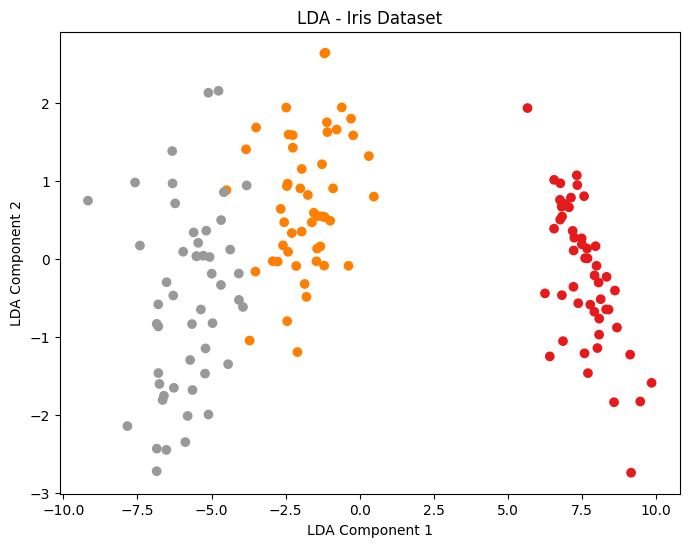

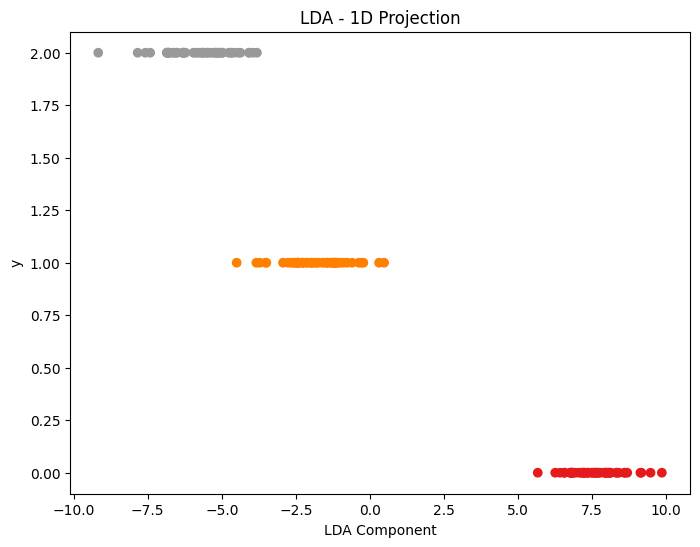

In [9]:
# Create a scatter plot of the reduced dataset
plot_2d('lda', x_iris_lda2d)
plot_1d('lda', x_iris_lda1d)


### TSNE


In [10]:
from sklearn.manifold import TSNE

# tsne3d = TSNE(n_components=3)
tsne2d1 = TSNE(n_components=2, perplexity=30)
tsne2d2 = TSNE(n_components=2, perplexity=15)
tsne2d3 = TSNE(n_components=2, perplexity=3)

# x_iris_tsne3d = tsne3d.fit_transform(x_iris)
x_iris_tsne2d1 = tsne2d1.fit_transform(x_iris)
x_iris_tsne2d2 = tsne2d2.fit_transform(x_iris)
x_iris_tsne2d3 = tsne2d3.fit_transform(x_iris)

The perplexity parameter can be seen as a knob that adjusts the effective number of neighbors that each point "sees" in the reduced space. 
A higher perplexity value implies that each point is considering more neighbors, 
leading to a smoother and more global representation of the data.

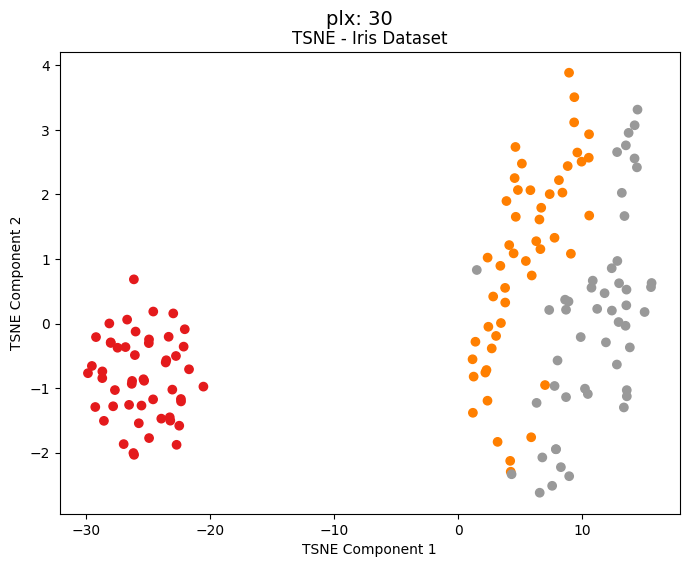

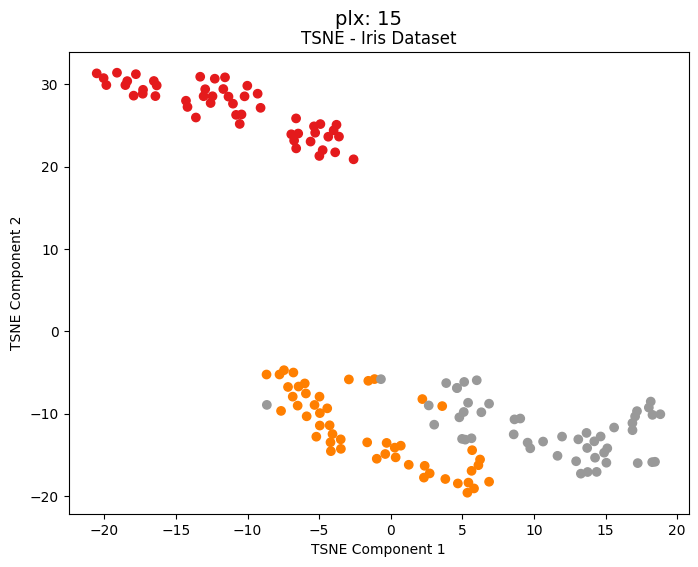

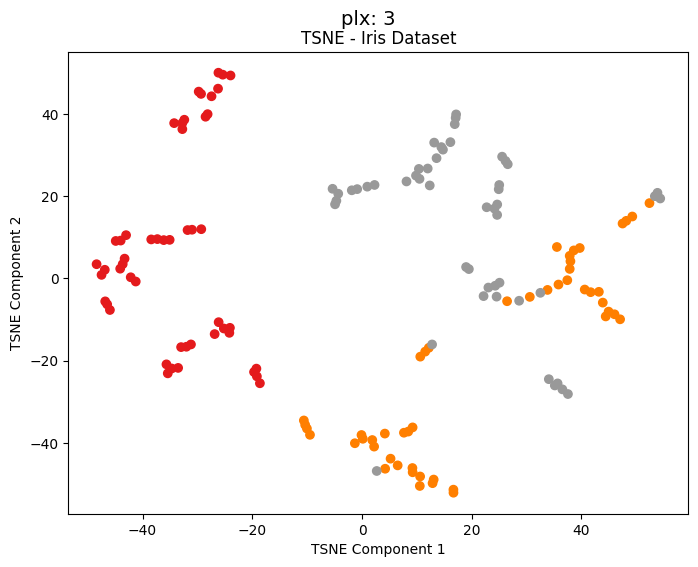

In [11]:

plot_2d('tsne', x_iris_tsne2d1, info="plx: 30")
plot_2d('tsne', x_iris_tsne2d2, info="plx: 15")
plot_2d('tsne', x_iris_tsne2d3, info="plx: 3")

### UMAP


In [12]:
from umap import UMAP

umap2d1 = UMAP(n_components=2, n_neighbors=10, min_dist=0.1)
umap2d3 = UMAP(n_components=2, n_neighbors=10, min_dist=0.8)
umap2d2 = UMAP(n_components=2, n_neighbors=30, min_dist=0.1)
umap1d1 = UMAP(n_components=1, n_neighbors=10, min_dist=0.1)
umap1d2 = UMAP(n_components=1, n_neighbors=10, min_dist=0.8)
x_iris_umap2d1 = umap2d1.fit_transform(x_iris)
x_iris_umap2d2 = umap2d2.fit_transform(x_iris)
x_iris_umap2d3 = umap2d3.fit_transform(x_iris)
x_iris_umap1d1 = umap1d1.fit_transform(x_iris)
x_iris_umap1d2 = umap1d2.fit_transform(x_iris)

/home/divyan-18871/Developer/Learning/ml_/pyenv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/divyan-18871/Developer/Learning/ml_/pyenv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/divyan-18871/Developer/Learning/ml_/py

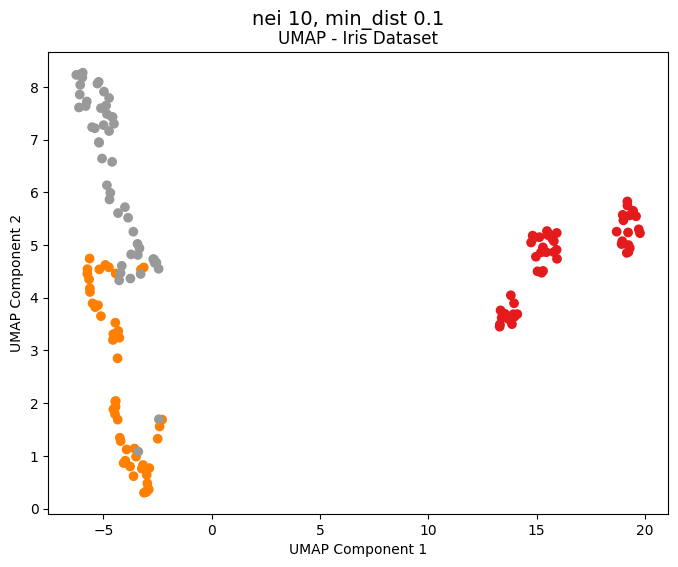

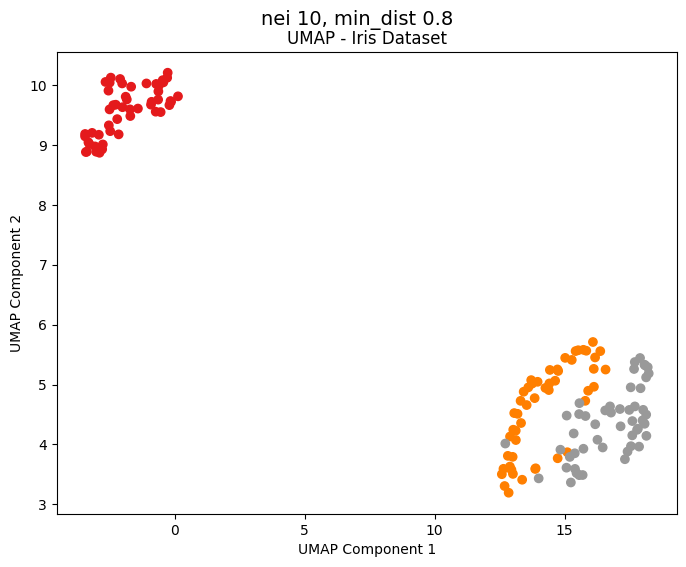

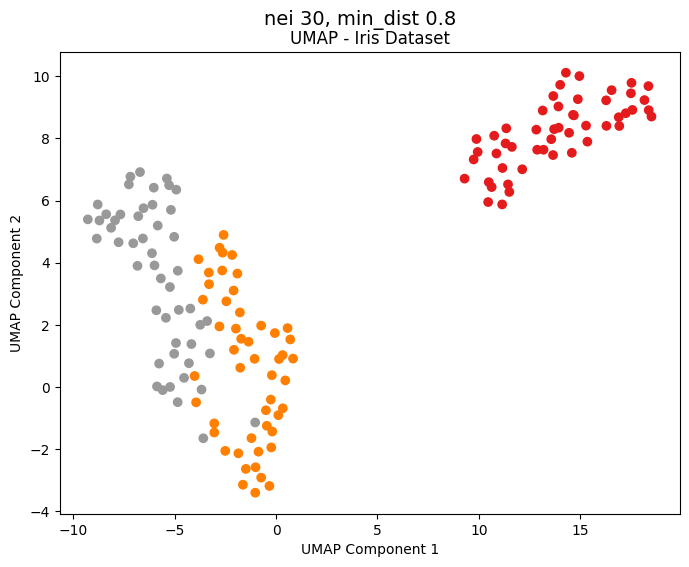

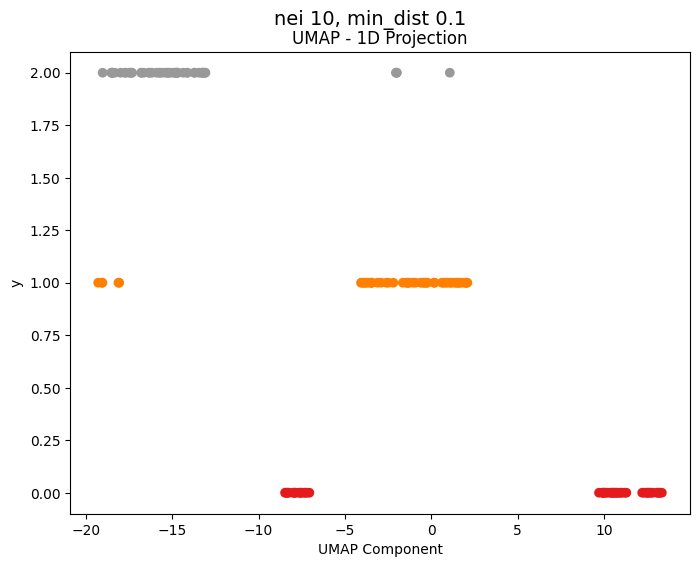

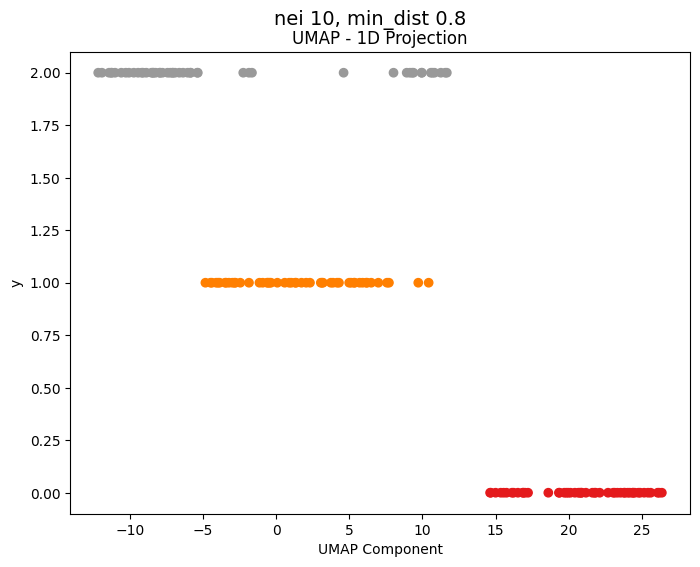

In [13]:
plot_2d('umap', x_iris_umap2d1, info="nei 10, min_dist 0.1")
plot_2d('umap', x_iris_umap2d2, info="nei 10, min_dist 0.8")
plot_2d('umap', x_iris_umap2d3, info="nei 30, min_dist 0.8")
plot_1d('umap', x_iris_umap1d1, info="nei 10, min_dist 0.1")
plot_1d('umap', x_iris_umap1d2, info="nei 10, min_dist 0.8")

In [14]:
from sklearn.decomposition import TruncatedSVD

svd2d = TruncatedSVD(n_components=2)
x_iris_svd2d = svd2d.fit_transform(x_iris)

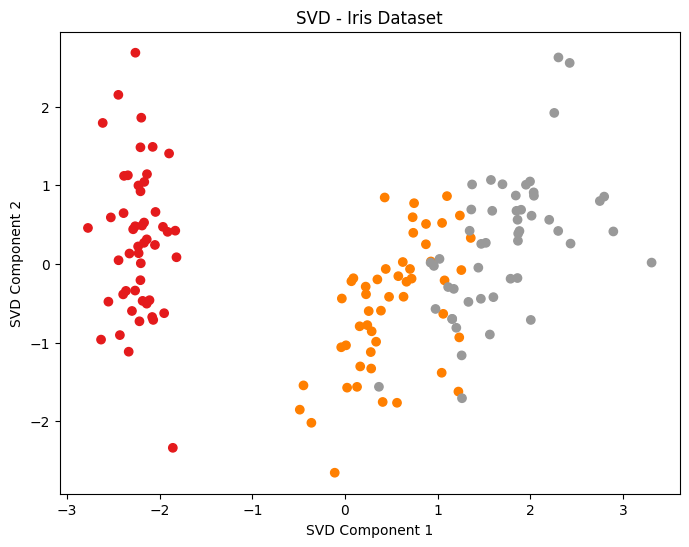

In [15]:
plot_2d('svd', x_iris_svd2d)

NameError: name 'x_iris_tsne2d' is not defined

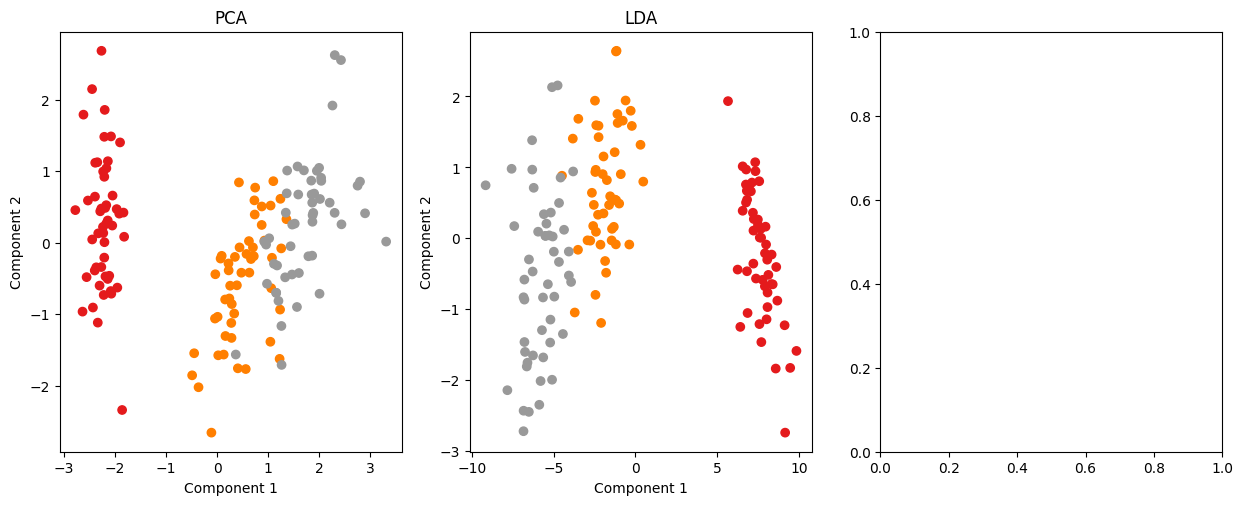

In [16]:

plt.figure(figsize=(15, 12))

# PCA
plt.subplot(2, 3, 1)
plt.scatter(x_iris_pca2d[:, 0], x_iris_pca2d[:, 1], c=y_iris, cmap=plt.cm.Set1)
plt.title("PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# LDA
plt.subplot(2, 3, 2)
plt.scatter(x_iris_lda2d[:, 0], x_iris_lda2d[:, 1], c=y_iris, cmap=plt.cm.Set1)
plt.title("LDA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# t-SNE
plt.subplot(2, 3, 3)
plt.scatter(x_iris_tsne2d[:, 0], x_iris_tsne2d[:, 1], c=y_iris, cmap=plt.cm.Set1)
plt.title("t-SNE")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# UMAP
plt.subplot(2, 3, 4)
plt.scatter(x_iris_umap2d[:, 0], x_iris_umap2d[:, 1], c=y_iris, cmap=plt.cm.Set1)
plt.title("UMAP")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# SVD
plt.subplot(2, 3, 5)
plt.scatter(x_iris_svd2d[:, 0], x_iris_svd2d[:, 1], c=y_iris, cmap=plt.cm.Set1)
plt.title("TruncatedSVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.tight_layout()
plt.show()
